## Project on Bitcoin Price Prediction









### Understanding the Domain

#### Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow.

## Importing Important Libraries

In [191]:
import pandas as pd         # Pandas is being used here for data exploration and modeling.
import numpy as np          # Numpy(Numerical Python)for scientific computing and performing basic and advanced array operations.
import seaborn as sns       # Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt # Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
%matplotlib inline

## Importing Dataset

In [192]:
bitcoin=pd.read_csv("C:\data sets\Bitcoin.csv")

In [193]:
bitcoin.shape        # To check the number of rows and columns in dataset.

(2099760, 8)

In [194]:
bitcoin.isnull().sum()        # Counting of Null Values in Our Dataset.

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [195]:
bitcoin.info()    # Getting information about dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


### Converting Timestamp of bitcoin dataset into Date and Time.

In [196]:
bitcoin["Timestamp"]=pd.to_datetime(bitcoin["Timestamp"],unit="s") # Here...considered unit as second.

## Treating Missing Values of Columns

In [197]:
bitcoin['Volume_(BTC)'].fillna(method='ffill', inplace=True)
bitcoin['Volume_(Currency)'].fillna(method='ffill', inplace=True)
bitcoin['Weighted_Price'].fillna(method='ffill', inplace=True)


bitcoin['Open'].fillna(method='ffill', inplace=True)
bitcoin['High'].fillna(method='ffill', inplace=True)
bitcoin['Low'].fillna(method='ffill', inplace=True)
bitcoin['Close'].fillna(method='ffill', inplace=True)

In [198]:
# Here I have renamed the column name of timestamp into Date and time because it has been converted into date and time.
bitcoin.rename(columns={'Timestamp':'Date and Time'},inplace=True)

In [199]:
bitcoin.head() # Column name of Timestamp has been updated.

,Date and Time,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,2014-12-01 05:35:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,2014-12-01 05:36:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,2014-12-01 05:37:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [200]:
bitcoin.isnull().sum()
# After treating missing values finally checking for any other NaN value

Date and Time        0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

## Outlier Detection 

 ### (An outlier is an object that deviates significantly from the rest of the objects.)

In [1]:
def detect_outliers(data):
    outlier=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [202]:
x=detect_outliers(bitcoin["Open"])     # Marking the outliers
np.min(x)

14377.49

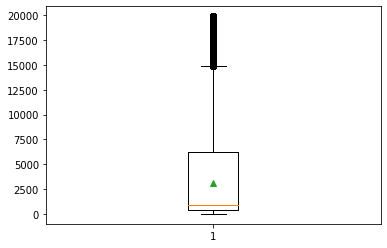

In [203]:
plt.boxplot(bitcoin["Open"],showmeans=True)    #plotting of x(Outliers) using boxplot
plt.show()

In [204]:
y=detect_outliers(bitcoin["Low"])     # Marking the outliers(y)
np.min(y)

14368.99

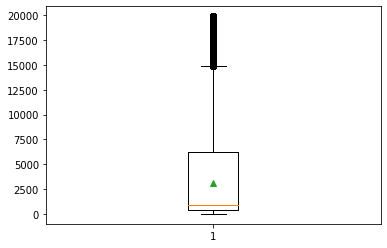

In [205]:
plt.boxplot(bitcoin["Low"],showmeans=True)    #plotting of y(Outliers) using boxplot.
plt.show()

In [206]:
y1=detect_outliers(bitcoin["High"])     # Marking the outliers
np.min(y1)

14385.73

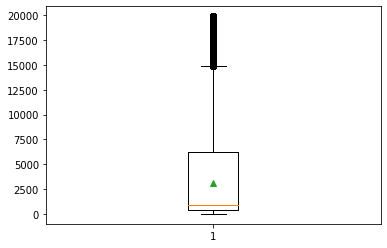

In [207]:
plt.boxplot(bitcoin["High"],showmeans=True)    #plotting of y1(Outliers) using boxplot.
plt.show()

In [210]:
x1=detect_outliers(bitcoin["Close"])     # Marking the outliers
np.min(x1)

14377.74

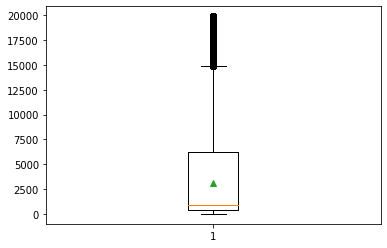

In [211]:
plt.boxplot(bitcoin["Close"],showmeans=True)    #plotting of x1(Outliers) using boxplot.
plt.show()

# Standardization

In [212]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
a1=scaling.fit_transform(bitcoin[["High"]])
a2=scaling.fit_transform(bitcoin[["Low"]])
a3=scaling.fit_transform(bitcoin[["Open"]])
a4=scaling.fit_transform(bitcoin[["Close"]])

In [213]:
a1=pd.DataFrame(a1)
a2=pd.DataFrame(a2)
a3=pd.DataFrame(a3)
a4=pd.DataFrame(a4)

In [214]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
a1=scaling.fit_transform(bitcoin[["High"]])
a2=scaling.fit_transform(bitcoin[["Low"]])

In [215]:
a1

array([[0.01507848],
       [0.01507848],
       [0.01507848],
       ...,
       [0.20138569],
       [0.20138569],
       [0.20138569]])

In [216]:
a2

array([[0.01507848],
       [0.01507848],
       [0.01507848],
       ...,
       [0.20138529],
       [0.20136015],
       [0.20136065]])

In [217]:
a3

,0
0,-0.747081
1,-0.747081
2,-0.747081
3,-0.747081
4,-0.747081
5,-0.747081
6,-0.747081
7,-0.747081
8,-0.747081
9,-0.747081


In [218]:
a4

,0
0,-0.747075
1,-0.747075
2,-0.747075
3,-0.747075
4,-0.747075
5,-0.747075
6,-0.747075
7,-0.747075
8,-0.747075
9,-0.747075


## Data Visualizations

In [169]:
bitcoin.corr() # Finding highly correlated columns...so that it can be treated.

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999998,0.999998,0.999997,0.155748,0.402938,0.999999
High,0.999998,1.000000,0.999996,0.999998,0.156343,0.403786,0.999999
Low,0.999998,0.999996,1.000000,0.999998,0.155085,0.402022,0.999999
Close,0.999997,0.999998,0.999998,1.000000,0.155728,0.402930,0.999999
Volume_(BTC),0.155748,0.156343,0.155085,0.155728,1.000000,0.708594,0.155700
Volume_(Currency),0.402938,0.403786,0.402022,0.402930,0.708594,1.000000,0.402887
Weighted_Price,0.999999,0.999999,0.999999,0.999999,0.155700,0.402887,1.000000


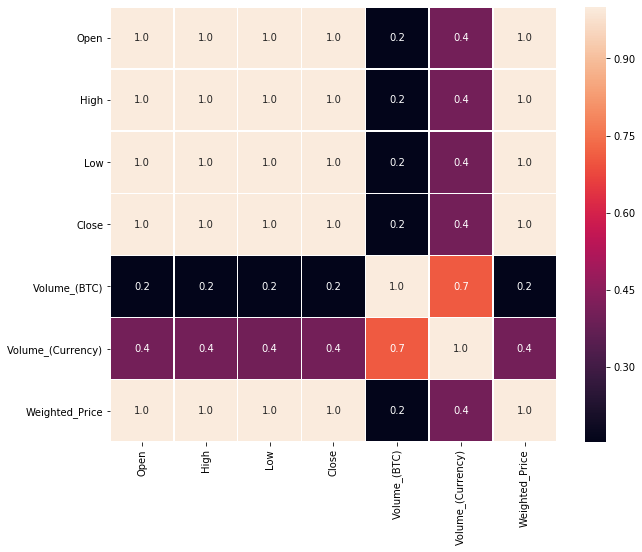

In [170]:
# Plotting above table in the form of Heatmap
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(bitcoin.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# Plotting graph of independent columns

In [171]:
Open = bitcoin[["Open"]]                     #  Selecting only the required coloumn which has to be pplot.
High = bitcoin[["High"]] 
Low  = bitcoin[["Low"]]
Close= bitcoin[["Close"]]

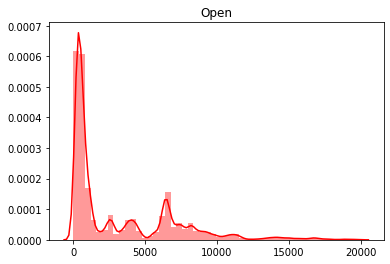

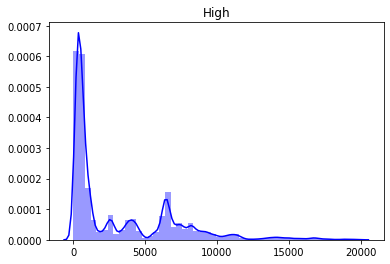

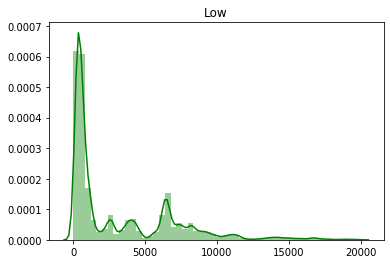

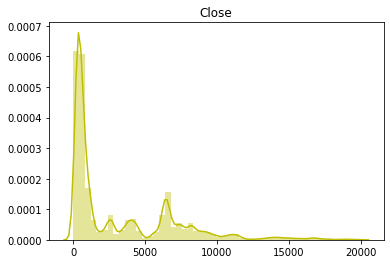

In [172]:
fig=sns.distplot(High,color='r',kde=True)
plt.title("Open")
plt.show()

fig=sns.distplot(High,color='b',kde=True)
plt.title("High")
plt.show()

fig=sns.distplot(Low,color='g',kde=True)
plt.title("Low")
plt.show()

fig=sns.distplot(Close,color='y',kde=True)
plt.title("Close")
plt.show()

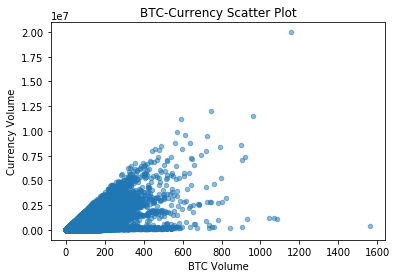

In [16]:
# Scatter Plot... by using Matplotlib.

bitcoin.plot(kind='scatter', x='Volume_(BTC)', y='Volume_(Currency)',alpha = 0.5)
plt.xlabel('BTC Volume')            
plt.ylabel('Currency Volume')
plt.title('BTC-Currency Scatter Plot') 
plt.show()

## Splitting Data into Training set and Testing set

In [249]:
# Higly correlated column has been dropped.

x=bitcoin.iloc[:,[2,3]]
y=bitcoin.iloc[:,7]

#### Devided the Training set as 80% and Testing set as 20%

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Applying Linear Regression algorithm for prediction

In [251]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

## Training the Simple Linear Regression model on the Training Set

In [252]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing 

In [253]:
y_test

207663       225.695914
1439693     4379.019694
28430        233.958584
267978       290.909257
1012932      780.052620
1741460     9604.991930
1841997     6166.181703
1129271     1273.990338
1041009     1028.934963
1877712     6940.514582
446560       330.104032
1523975    11408.822387
62670        238.195049
2017988     6374.261777
942594       654.620000
399814       253.374868
1717301     8117.013331
1345113     2756.739896
429915       400.199596
1519841     9764.013101
1825677     6334.989909
1236230     1818.791857
861023       574.968689
428951       487.987594
1480800     7147.607320
1971039     6500.991944
1616810     6741.567852
1991678     6436.197252
2077228     4002.010000
1718962     8089.998537
               ...     
408741       267.610000
1242853     2209.014948
1524166    11462.917492
253734       271.086824
1758971     8219.007979
1693338     7123.561921
896620       603.296595
2064164     3263.264711
749853       682.446830
1798097     6845.000000
1673621     7915

## Predicting the test set result

In [254]:
pred=lm.predict(x_test)
pred

array([ 225.68574751, 4379.00587973,  233.75062098, ...,  289.58578937,
        609.03594286, 6469.54905293])

In [255]:
lm.intercept_

-0.004369480789591762

In [256]:
lm.coef_

array([0.49972133, 0.50027924])

In [257]:
from sklearn.metrics import r2_score

In [258]:
r2_score(y_test,pred)

0.9999997311079298

# Conclusion

### When I started the project from the given dataset which was consisting of 2099760 no. of rows in which 109069 rows were containing missing values. After treating those missing values certain outliers has also been detected and showed in boxplot also. Then standardization has also been done . When it comes to data visualization I have also plotted some basic graph plots. When it comes to prediction then the dependent column and independent columns has been splitted in the form of training set and testing set using SkLearn Library. Then the Linear Regression algorithm has been implemented, and after all computations and analysis the current prediction rate of the model is 99%.